In [1]:
import time
import numpy as np
from scipy import signal
from itertools import product
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
# Gaussian
def fct_Gauss(x,esp,sig):
    #return np.exp(-0.5*(x-esp)**2/sig**2)
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-0.5*(x-esp)**2/sig**2)

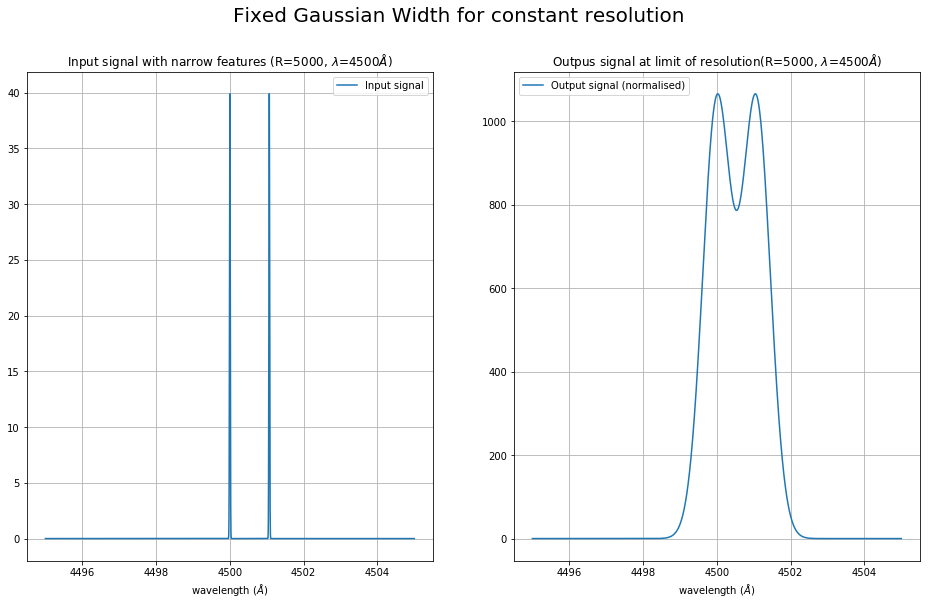

minimum local located at: [5534]
value of minimums: [786.7542569512835]
peaks located at: [5025 6043]
value of peaks: [1066.383880883829]
contrast: [0.15089518596774262]
Distance between 2 peaks: 1.0680131570282587
Sigma of input: 0.01
Sigma of Gauss: 0.3821948525999456
Sigma of output: 0.3823256535388309
Integral input: 1.9999999999999967
Integral output: 1999.8000000000943
Time used: 14.47849726676941


In [14]:
###### Fixed Gaussian Width for constant resolution ######

start = time. time()
######## variables changeables ########
n = 10000      # step
n_pic = 2      # number of peaks
wavelength = np.linspace(4495,4505,n)
sig_in = 0.01  # random choice (???)
R = 5000       # a constant resolution
lam = wavelength[int(n/2)]     # at a given wavelength
######################################
dLam = lam/R   # dλ define the h(x) 
sig_g = dLam / np.sqrt(8*np.log(2))
sig_out = np.sqrt(sig_in**2+sig_g**2)
cste = np.sqrt(-np.log(0.37703)*8) # calcul done by hand, d~cste*λ/R
d = cste*sig_out   # distance between 2 peaks
D = d * (n_pic-1)  # distance between 1st and last peaks
distance = np.linspace(lam,lam+D,n_pic)
# creat a narrow Gaussian input signal
f = np.zeros(n)
for i in range(n_pic):
    f += fct_Gauss(wavelength,distance[i],sig_in)
# convolve with a Gaussian defined by resolution
g = np.zeros(n)
Gaus = np.zeros(n)
for i in range(n):
    Gaus += fct_Gauss(wavelength,wavelength[i],sig_g)
    g += f[i] * fct_Gauss(wavelength,wavelength[i],sig_g)
# Normalise the output flux to the input one 
#g = g * np.trapz(f,wavelength) / np.trapz(g,wavelength)

plt.figure(figsize=[16,9])
plt.suptitle('Fixed Gaussian Width for constant resolution',fontsize=20)
plt.subplot(121)
plt.title("Input signal with narrow features (R=5000, $\lambda$=4500$\AA$)")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,f,label='Input signal')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title("Outpus signal at limit of resolution(R=5000, $\lambda$=4500$\AA$)")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,g,label='Output signal (normalised)')
plt.legend()
plt.grid(True)
plt.show()

### Contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(g)[0]
print ('minimum local located at:',x_min_loc)
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(g[i])
print ('value of minimums:',f_min_loc)

# find the index of all the peaks
x_peaks = signal.find_peaks(g)[0]
print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks[0:-1]:
    f_peaks.append(g[i])
print ('value of peaks:',f_peaks)
contrast_all = []
for i in range(len(f_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print('contrast:',contrast_all)
print('Distance between 2 peaks at input:',d)
print('Distance between 2 peaks at output:', wavelength[x_peaks[1]] - wavelength[x_peaks[0]])
print('Sigma of input:', sig_in)
print('Sigma of Gauss:', sig_g)
print('Sigma of output:', sig_out)
print('Integral input:', np.trapz(f,wavelength))
print('Integral output:', np.trapz(g,wavelength))
end = time. time()
print('Time used:',end - start)

In [16]:
print (wavelength[x_peaks[1]] - wavelength[x_peaks[0]])
print(np.trapz(f,wavelength))
print(np.trapz(g,wavelength))
print(np.trapz(Gaus,wavelength))
x_peaks

1.0181018101811787
1.9999999999999967
1999.8000000000943
9694.582774654946


array([5025, 6043])

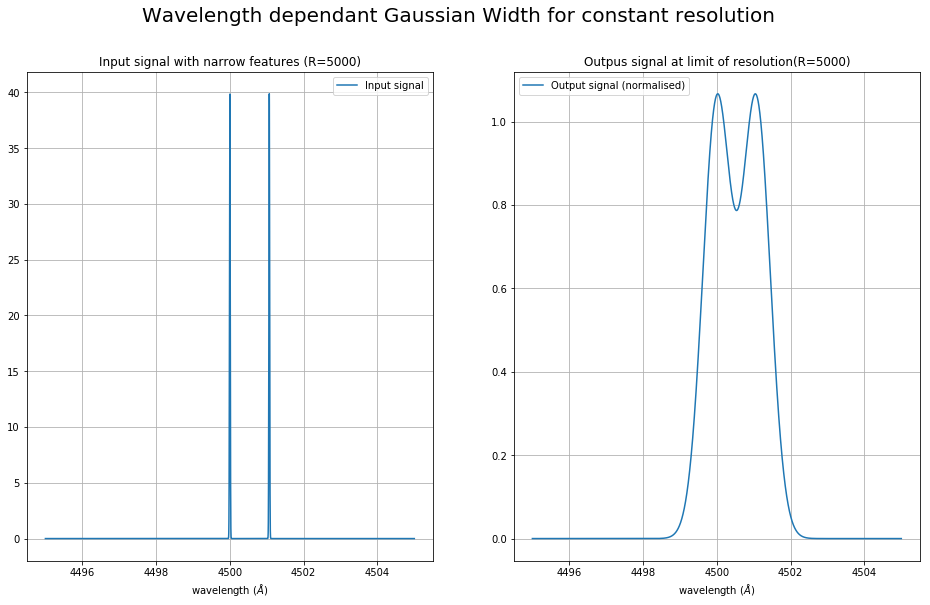

minimum local located at: [5534]
value of minimums: [0.7866514740771362]
peaks located at: [5025 6042]
value of peaks: [1.066489865689521]
contrast: [0.15100758134704464]
Distance between 2 peaks at input: [1.06682717 1.06682741 1.06682764 ... 1.06919843 1.06919867 1.06919891]
Distance between 2 peaks at output: 1.0171017101711186
Sigma of input: 0.01
Sigma of Gauss: [0.38177015 0.38177023 0.38177032 ... 0.3826193  0.38261939 0.38261947]
Sigma of output: [0.3819011  0.38190118 0.38190127 ... 0.38274996 0.38275004 0.38275013]
Integral input: 2.0002372301663733
Integral output: 2.000237230166374
Time used: 7.784040451049805


In [37]:
###### Wavelength dependant Gaussian Width for constant resolution ######
start = time. time()
######## variables changeables ########
n = 10000      # step
n_pic = 2      # number of peaks
wavelength = np.linspace(4495,4505,n)
sig_in = 0.01  # random choice (???)
R = 5000       # a constant resolution
######################################
dLam = wavelength/R   # dλ define the h(x) 
sig_g = dLam / np.sqrt(8*np.log(2))
sig_out = np.sqrt(sig_in**2+sig_g**2)
cste = np.sqrt(-np.log(0.37703)*8) # calcul done by hand, d~cste*λ/R
d = cste*sig_out   # distance between 2 peaks
D = d * (n_pic-1)  # distance between 1st and last peaks
position_0 = 4500
distance = np.linspace(position_0,position_0+D,n_pic)
######################################
# creat a narrow Gaussian input signal
f = np.zeros(n)
for i in range(n_pic):
    f += fct_Gauss(wavelength,distance[i],sig_in)
# convolve with a Gaussian defined by resolution
g = np.zeros(n)
for i in range(n):
    g += f[i] * fct_Gauss(wavelength,wavelength[i],sig_g[i])
# Normalise the output flux to the input one 
g = g * np.trapz(f,wavelength) / np.trapz(g,wavelength)

plt.figure(figsize=[16,9])
plt.suptitle('Wavelength dependant Gaussian Width for constant resolution',fontsize=20)
plt.subplot(121)
plt.title("Input signal with narrow features (R=5000)")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,f,label='Input signal')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title("Outpus signal at limit of resolution(R=5000)")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,g,label='Output signal (normalised)')
plt.legend()
plt.grid(True)
plt.show()

### Contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(g)[0]
print ('minimum local located at:',x_min_loc)
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(g[i])
print ('value of minimums:',f_min_loc)

# find the index of all the peaks
x_peaks = signal.find_peaks(g)[0]
print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks[0:-1]:
    f_peaks.append(g[i])
print ('value of peaks:',f_peaks)
contrast_all = []
for i in range(len(f_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print('contrast:',contrast_all)
print('Distance between 2 peaks at input:',d)
print('Distance between 2 peaks at output:', wavelength[x_peaks[1]] - wavelength[x_peaks[0]])
print('Sigma of input:', sig_in)
print('Sigma of Gauss:', sig_g)
print('Sigma of output:', sig_out)
print('Integral input:', np.trapz(f,wavelength))
print('Integral output:', np.trapz(g,wavelength))
end = time. time()
print('Time used:',end - start)

In [27]:
print (wavelength[x_peaks[1]] - wavelength[x_peaks[0]])

1.0171017101711186


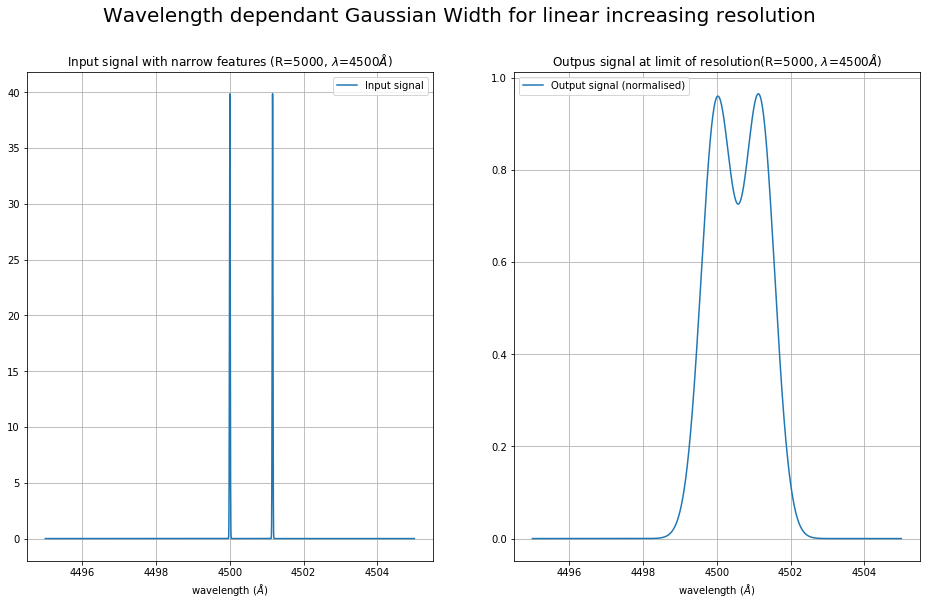

minimum local located at: [5577]
value of minimums: [0.725743884135587]
peaks located at: [5029 6124]
value of peaks: [0.9600259923626531]
contrast: [0.1389763285566164]
Distance between 2 peaks: [1.33336937 1.33333635 1.33330332 ... 1.06924118 1.06922004 1.06919891]
Sigma of input: 0.01
Sigma of Gauss: [0.47721269 0.47720086 0.47718904 ... 0.38263461 0.38262704 0.38261947]
Sigma of output: [0.47731745 0.47730563 0.47729381 ... 0.38276526 0.38275769 0.38275013]
Integral input: 1.9758014284452858
Integral output: 1.975801428445286
Time used: 7.808735370635986


In [25]:
###### Wavelength dependant Gaussian Width for linear increasing resolution ######
start = time. time()
######## variables changeables ########
n = 10000      # step
n_pic = 2      # number of peaks
wavelength = np.linspace(4495,4505,n)
sig_in = 0.01  # random choice (???)
R = np.linspace(4000,5000,n)           # a linear increasing resolution
######################################
dLam = wavelength/R   # dλ define the h(x) 
sig_g = dLam / np.sqrt(8*np.log(2))
sig_out = np.sqrt(sig_in**2+sig_g**2)
cste = np.sqrt(-np.log(0.37703)*8)     # calcul done by hand, d~cste*λ/R
d = cste*sig_out   # distance between 2 peaks
D = d * (n_pic-1)  # distance between 1st and last peaks
position_0 = 4500
distance = np.linspace(position_0,position_0+D,n_pic)    ###### probleme #######
######################################
# creat a narrow Gaussian input signal
f = np.zeros(n)
for i in range(n_pic):
    f += fct_Gauss(wavelength,distance[i],sig_in)
# convolve with a Gaussian defined by resolution
g = np.zeros(n)
for i in range(n):
    g += f[i] * fct_Gauss(wavelength,wavelength[i],sig_g[i])
# Normalise the output flux to the input one 
g = g * np.trapz(f,wavelength) / np.trapz(g,wavelength)

plt.figure(figsize=[16,9])
plt.suptitle('Wavelength dependant Gaussian Width for linear increasing resolution',fontsize=20)
plt.subplot(121)
plt.title("Input signal with narrow features (R=5000, $\lambda$=4500$\AA$)")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,f,label='Input signal')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title("Outpus signal at limit of resolution(R=5000, $\lambda$=4500$\AA$)")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,g,label='Output signal (normalised)')
plt.legend()
plt.grid(True)
plt.show()

### Contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(g)[0]
print ('minimum local located at:',x_min_loc)
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(g[i])
print ('value of minimums:',f_min_loc)

# find the index of all the peaks
x_peaks = signal.find_peaks(g)[0]
print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks[0:-1]:
    f_peaks.append(g[i])
print ('value of peaks:',f_peaks)
contrast_all = []
for i in range(len(f_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print('contrast:',contrast_all)
print('Distance between 2 peaks at input:',d)
print('Distance between 2 peaks at output:', wavelength[x_peaks[1]] - wavelength[x_peaks[0]])
print('Sigma of input:', sig_in)
print('Sigma of Gauss:', sig_g)
print('Sigma of output:', sig_out)
print('Integral input:', np.trapz(f,wavelength))
print('Integral output:', np.trapz(g,wavelength))
end = time. time()
print('Time used:',end - start)

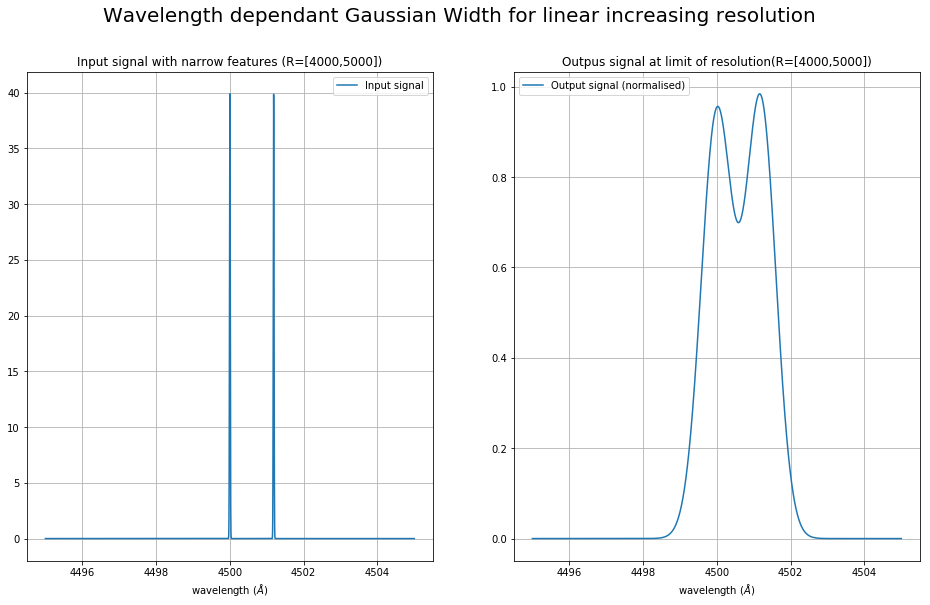

minimum local located at: [5586]
value of minimums: [0.6990704950731353]
peaks located at: [5024 6161]
value of peaks: [0.9563694729672749]
contrast: [0.1554263415536061]
Distance between 2 peaks at input: 1.186590980499364
Distance between 2 peaks at output: 1.1371137113710574
Sigma of input: 0.01
Sigma of Gauss: [0.47721269 0.47720086 0.47718904 ... 0.38263461 0.38262704 0.38261947]
Sigma of output: [0.47731745 0.47730563 0.47729381 ... 0.38276526 0.38275769 0.38275013]
Integral input: 1.999999999999998
Integral output: 1.999999999999998
Time used: 7.809816122055054


In [34]:
###### Wavelength dependant Gaussian Width for linear increasing resolution ######

start = time. time()

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

######## variables changeables ########
n = 10000      # step
n_pic = 2      # number of peaks
wavelength = np.linspace(4495,4505,n)
sig_in = 0.01  # random choice (???)
R = np.linspace(4000,5000,n)           # a linear increasing resolution
######################################
dLam = wavelength/R   # dλ define the h(x) 
sig_g = dLam / np.sqrt(8*np.log(2))
sig_out = np.sqrt(sig_in**2+sig_g**2)
cste = np.sqrt(-np.log(0.37703)*8)     # calcul done by hand, d~cste*λ/R
# instead of equally position the peaks, need to find d -> 15%
position_0 = wavelength[int(n/2)]       # designate a random position of the first peak
position = [position_0]
for i in range(n_pic-1):
    x = np.where(wavelength == find_nearest(wavelength, position[i]))[0][0]
    position.append(position[i] + cste*sig_out[x])  # sig_out^2
    d = cste*sig_out[x]
######################################
# creat a narrow Gaussian input signal
f = np.zeros(n)
for i in range(n_pic):
    f += fct_Gauss(wavelength,position[i],sig_in)
# convolve with a Gaussian defined by resolution
g = np.zeros(n)
for i in range(n):
    g += f[i] * fct_Gauss(wavelength,wavelength[i],sig_g[i])
# Normalise the output flux to the input one 
g = g * np.trapz(f,wavelength) / np.trapz(g,wavelength)

plt.figure(figsize=[16,9])
plt.suptitle('Wavelength dependant Gaussian Width for linear increasing resolution',fontsize=20)
plt.subplot(121)
plt.title("Input signal with narrow features (R=[4000,5000])")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,f,label='Input signal')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title("Outpus signal at limit of resolution(R=[4000,5000])")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,g,label='Output signal (normalised)')
plt.legend()
plt.grid(True)
plt.show()

### Contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(g)[0]
print ('minimum local located at:',x_min_loc)
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(g[i])
print ('value of minimums:',f_min_loc)

# find the index of all the peaks
x_peaks = signal.find_peaks(g)[0]
print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks[0:-1]:
    f_peaks.append(g[i])
print ('value of peaks:',f_peaks)
contrast_all = []
for i in range(len(f_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print('contrast:',contrast_all)
print('Distance between 2 peaks at input:',d)
print('Distance between 2 peaks at output:', wavelength[x_peaks[1]] - wavelength[x_peaks[0]])
print('Sigma of input:', sig_in)
print('Sigma of Gauss:', sig_g)
print('Sigma of output:', sig_out)
print('Integral input:', np.trapz(f,wavelength))
print('Integral output:', np.trapz(g,wavelength))
end = time. time()
print('Time used:',end - start)

In [30]:
print (wavelength[x_peaks[1]] - wavelength[x_peaks[0]])

1.1371137113710574


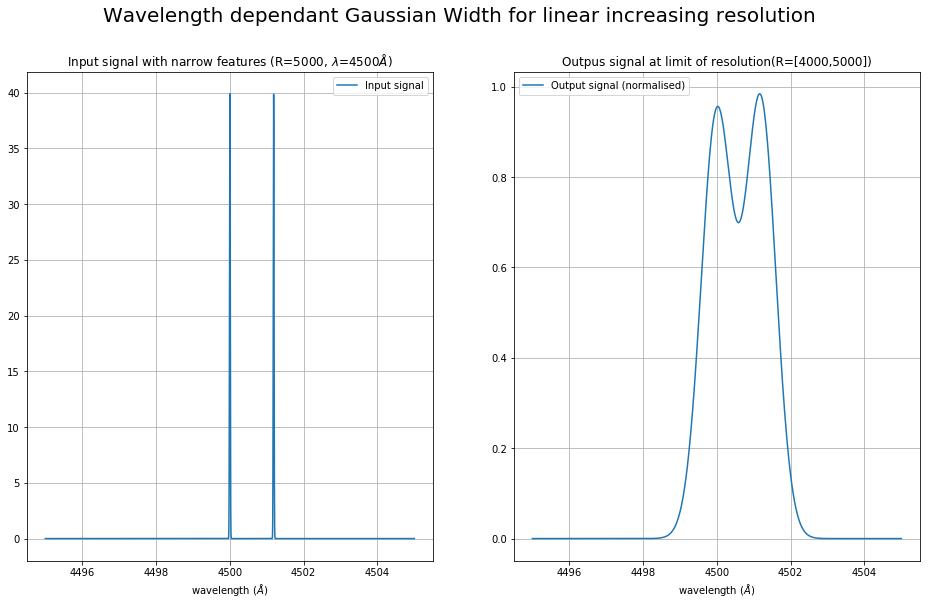

minimum local located at: [5586]
value of minimums: [0.6990704950731353]
peaks located at: [5024 6161]
value of peaks: [0.9563694729672749]
contrast: [0.1554263415536061]
Distance between 2 peaks at input: 1.186590980499364
Distance between 2 peaks at output: 1.1371137113710574
Sigma of input: 0.01
Sigma of Gauss: [0.47721269 0.47720086 0.47718904 ... 0.38263461 0.38262704 0.38261947]
Sigma of output: [0.47731745 0.47730563 0.47729381 ... 0.38276526 0.38275769 0.38275013]
Integral input: 1.999999999999998
Integral output: 1.999999999999998
Time used: 7.621495485305786


In [35]:
###### Wavelength dependant Gaussian Width for linear increasing resolution ######
start = time. time()

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

######## variables changeables ########
n = 10000      # step
n_pic = 2      # number of peaks
wavelength = np.linspace(4495,4505,n)
sig_in = 0.01  # random choice (???)
R = np.linspace(4000,5000,n)           # a linear increasing resolution
######################################
dLam = wavelength/R   # dλ define the h(x) 
sig_g = dLam / np.sqrt(8*np.log(2))
sig_out = np.sqrt(sig_in**2+sig_g**2)
cste = np.sqrt(-np.log(0.37703)*8)     # calcul done by hand, d~cste*λ/R
# instead of equally position the peaks, need to find d -> 15%
position_0 = wavelength[int(n/2)]       # designate a random position of the first peak
position = [position_0]
for i in range(n_pic-1):
    x = np.where(wavelength == find_nearest(wavelength, position[i]))[0][0]
    position.append(position[i] + cste*sig_out[x])  # sig_out^2
######################################
# creat a narrow Gaussian input signal
f = np.zeros(n)
for i in range(n_pic):
    f += fct_Gauss(wavelength,position[i],sig_in)
# convolve with a Gaussian defined by resolution
g = np.zeros(n)
for i in range(n):
    g += f[i] * fct_Gauss(wavelength,wavelength[i],sig_g[i])
# Normalise the output flux to the input one 
g = g * np.trapz(f,wavelength) / np.trapz(g,wavelength)

plt.figure(figsize=[16,9])
plt.suptitle('Wavelength dependant Gaussian Width for linear increasing resolution',fontsize=20)
plt.subplot(121)
plt.title("Input signal with narrow features (R=5000, $\lambda$=4500$\AA$)")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,f,label='Input signal')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title("Outpus signal at limit of resolution(R=[4000,5000])")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,g,label='Output signal (normalised)')
plt.legend()
plt.grid(True)
plt.show()

### Contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(g)[0]
print ('minimum local located at:',x_min_loc)
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(g[i])
print ('value of minimums:',f_min_loc)

# find the index of all the peaks
x_peaks = signal.find_peaks(g)[0]
print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks[0:-1]:
    f_peaks.append(g[i])
print ('value of peaks:',f_peaks)
contrast_all = []
for i in range(len(f_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print('contrast:',contrast_all)
print('Distance between 2 peaks at input:',d)
print('Distance between 2 peaks at output:', wavelength[x_peaks[1]] - wavelength[x_peaks[0]])
print('Sigma of input:', sig_in)
print('Sigma of Gauss:', sig_g)
print('Sigma of output:', sig_out)
print('Integral input:', np.trapz(f,wavelength))
print('Integral output:', np.trapz(g,wavelength))
end = time. time()
print('Time used:',end - start)